<a href="https://colab.research.google.com/github/nyamskamau/Fifa-Dataset-Week-6/blob/main/Week_6_Fifa_Prediction_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Importing the Datasets and previewing the values Merging and Cleaning.



## 1.1. Importing the Datasets
The first step of my analysis was importing the appropriate libraries and the datasets used in this analysis.

Next I previewed the datasets and obtained information on the datatypes of the columns in my dataset.

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
result = pd.read_csv('results.csv')


In [ ]:
result.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [ ]:
result.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [ ]:
result.shape

(40839, 9)

In [ ]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   city        40839 non-null  object
 7   country     40839 non-null  object
 8   neutral     40839 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


In [ ]:
fifa = pd.read_csv('fifa_ranking.csv')
fifa

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07


In [ ]:
fifa.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [ ]:
fifa.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [ ]:
fifa.shape

(57793, 16)

In [ ]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

## 1.2.Witchcraft

Next I undertook several extensive steps to allow me to merge the two datasets given that the two had differing dates and they also had different tournaments.

In [ ]:
result.tournament.unique()

array(['Friendly', 'British Championship', 'Copa Lipton', 'Copa Newton',
       'Copa Premio Honor Argentino', 'Copa Premio Honor Uruguayo',
       'Copa Roca', 'Copa América', 'Copa Chevallier Boutell',
       'Nordic Championship', 'International Cup', 'Baltic Cup',
       'Balkan Cup', 'FIFA World Cup', 'Copa Rio Branco',
       'FIFA World Cup qualification', 'CCCF Championship',
       'NAFU Championship', 'Copa Oswaldo Cruz',
       'Pan American Championship', 'Copa del Pacífico',
       "Copa Bernardo O'Higgins", 'AFC Asian Cup qualification',
       'Atlantic Cup', 'AFC Asian Cup', 'African Cup of Nations',
       'Copa Paz del Chaco', 'Merdeka Tournament',
       'UEFA Euro qualification', 'UEFA Euro',
       'Windward Islands Tournament',
       'African Cup of Nations qualification', 'Vietnam Independence Cup',
       'Copa Carlos Dittborn', 'CONCACAF Championship',
       'Copa Juan Pinto Durán', 'UAFA Cup', 'South Pacific Games',
       'CONCACAF Championship qualificatio

In [ ]:
fifa.confederation.unique()

array(['UEFA', 'CONMEBOL', 'CONCACAF', 'CAF', 'AFC', 'OFC'], dtype=object)

In [ ]:
split = result['tournament'].str.split()
result['tournaments'] = split.str[0]

In [ ]:
fifa.confederation.replace({'OFC':'Oceania',
                            'CAF':'African'},inplace=True)

I renamed various columns on the Fifa dataset in order for me to then merge it with the results dataset.

I also coverted the Date columns on both datasets to  datetime format so I could split them into year , month and day

In [ ]:
fifa.rename(columns={'rank_date':'date',
                     'country_full':'country'
                     },inplace=True)

In [ ]:
result.date = pd.to_datetime(result['date'])#,format='YYYY-mm-dd')

In [ ]:
fifa.date = pd.to_datetime(fifa['date'])#,format='YYYY-mm-dd')

In [ ]:
fifa['year'] = fifa['date'].dt.year
fifa['month'] = fifa['date'].dt.month
fifa['day']= fifa['date'].dt.day

In [ ]:
result['year'] = result['date'].dt.year
result['month'] = result['date'].dt.month
result['day']= result['date'].dt.day

Finally I merged the two on year ,month and home_team and year ,month,country under the condition that the rank_date was greater than the playing date

In [ ]:
df = result.merge(fifa,how='inner',left_on=['year','month','home_team'],right_on=['year','month','country'])
df
df=df[df['day_x']<df['day_y']]
df

,date_x,home_team,away_team,home_score,away_score,tournament,city,country_x,neutral,tournaments,year,month,day_x,rank,country_y,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,date_y,day_y
0,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,False,FIFA,1993,8,1,19,Colombia,COL,0.00,36,16,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CONMEBOL,1993-08-08,8
3,1993-08-01,Peru,Argentina,0,1,FIFA World Cup qualification,Lima,Peru,False,FIFA,1993,8,1,70,Peru,PER,0.00,16,8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CONMEBOL,1993-08-08,8
5,1993-08-01,Uruguay,Ecuador,0,0,FIFA World Cup qualification,Montevideo,Uruguay,False,FIFA,1993,8,1,22,Uruguay,URU,0.00,47,-6,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CONMEBOL,1993-08-08,8
8,1993-08-01,Venezuela,Brazil,1,5,FIFA World Cup qualification,San Cristóbal,Venezuela,False,FIFA,1993,8,1,94,Venezuela,VEN,0.00,4,31,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CONMEBOL,1993-08-08,8
9,1993-08-07,Senegal,Zambia,0,0,FIFA World Cup qualification,Abidjan,Ivory Coast,True,FIFA,1993,8,7,58,Senegal,SEN,0.00,27,-7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,African,1993-08-08,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18564,2018-06-05,Kazakhstan,Azerbaijan,3,0,Friendly,Astana,Kazakhstan,False,Friendly,2018,6,5,117,Kazakhstan,KAZ,272.85,273,0,105.01,105.01,171.38,85.69,213.84,64.15,89.97,17.99,UEFA,2018-06-07,7
18565,2018-06-05,Lithuania,Latvia,1,1,Friendly,Vilnius,Lithuania,False,Friendly,2018,6,5,126,Lithuania,LTU,239.38,229,7,55.94,55.94,221.27,110.63,112.86,33.86,194.78,38.96,UEFA,2018-06-07,7
18567,2018-06-05,Chinese Taipei,New Zealand,0,1,Intercontinental Cup,Mumbai,India,True,Intercontinental,2018,6,5,123,Chinese Taipei,TPE,246.74,263,-2,175.19,175.19,107.44,53.72,29.22,8.77,45.37,9.07,AFC,2018-06-07,7
18569,2018-06-06,Norway,Panama,1,0,Friendly,Oslo,Norway,False,Friendly,2018,6,6,53,Norway,NOR,595.99,608,-5,414.26,414.26,61.88,30.94,320.27,96.08,273.54,54.71,UEFA,2018-06-07,7


Next I also merged it on the away_team and country columns in order to obtain the stats for the away_teams.

I then extracted these stats and using the merge function joined them to my dataset above giving me a complete dataset.

I then used this dataset in my analysis.

In [ ]:
df1 = result.merge(fifa,how='inner',left_on=['year','month','away_team'],right_on=['year','month','country'])
df1
df2=df1[df1['day_x']<df1['day_y']]
df2

,date_x,home_team,away_team,home_score,away_score,tournament,city,country_x,neutral,tournaments,year,month,day_x,rank,country_y,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,date_y,day_y
0,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,False,FIFA,1993,8,1,67,Paraguay,PAR,0.00,22,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CONMEBOL,1993-08-08,8
2,1993-08-01,Peru,Argentina,0,1,FIFA World Cup qualification,Lima,Peru,False,FIFA,1993,8,1,5,Argentina,ARG,0.00,51,5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CONMEBOL,1993-08-08,8
5,1993-08-01,Uruguay,Ecuador,0,0,FIFA World Cup qualification,Montevideo,Uruguay,False,FIFA,1993,8,1,35,Ecuador,ECU,0.00,23,30,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CONMEBOL,1993-08-08,8
8,1993-08-01,Venezuela,Brazil,1,5,FIFA World Cup qualification,San Cristóbal,Venezuela,False,FIFA,1993,8,1,8,Brazil,BRA,0.00,55,-5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CONMEBOL,1993-08-08,8
10,1993-08-07,Senegal,Zambia,0,0,FIFA World Cup qualification,Abidjan,Ivory Coast,True,FIFA,1993,8,7,25,Zambia,ZAM,0.00,38,7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,African,1993-08-08,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18474,2018-06-05,Kazakhstan,Azerbaijan,3,0,Friendly,Astana,Kazakhstan,False,Friendly,2018,6,5,105,Azerbaijan,AZE,321.48,245,21,98.83,98.83,345.00,172.50,121.71,36.51,68.18,13.64,UEFA,2018-06-07,7
18476,2018-06-05,Lithuania,Latvia,1,1,Friendly,Vilnius,Lithuania,False,Friendly,2018,6,5,129,Latvia,LVA,230.04,217,10,100.04,100.04,76.37,38.19,145.92,43.77,240.22,48.04,UEFA,2018-06-07,7
18477,2018-06-06,Norway,Panama,1,0,Friendly,Oslo,Norway,False,Friendly,2018,6,6,55,Panama,PAN,571.17,574,0,276.92,276.92,309.00,154.50,326.30,97.89,209.29,41.86,CONCACAF,2018-06-07,7
18480,2018-06-06,Belarus,Hungary,1,1,Friendly,Brest,Belarus,False,Friendly,2018,6,6,51,Hungary,HUN,611.82,604,-2,199.79,199.79,369.81,184.91,525.07,157.52,348.02,69.60,UEFA,2018-06-07,7


In [ ]:
away_rank = df2[['away_team','rank','rank_change','total_points','date_x']]
away_rank

,away_team,rank,rank_change,total_points,date_x
0,Paraguay,67,1,0.00,1993-08-01
2,Argentina,5,5,0.00,1993-08-01
5,Ecuador,35,30,0.00,1993-08-01
8,Brazil,8,-5,0.00,1993-08-01
10,Zambia,25,7,0.00,1993-08-07
...,...,...,...,...,...
18474,Azerbaijan,105,21,321.48,2018-06-05
18476,Latvia,129,10,230.04,2018-06-05
18477,Panama,55,0,571.17,2018-06-06
18480,Hungary,51,-2,611.82,2018-06-06


In [ ]:
df2.shape

(8894, 30)

In [ ]:
dataset = df.merge(away_rank,how='inner',left_on=['date_x','away_team'],right_on=['date_x','away_team'])
dataset

,date_x,home_team,away_team,home_score,away_score,tournament,city,country_x,neutral,tournaments,year,month,day_x,rank_x,country_y,country_abrv,total_points_x,previous_points,rank_change_x,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,date_y,day_y,rank_y,rank_change_y,total_points_y
0,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,False,FIFA,1993,8,1,19,Colombia,COL,0.00,36,16,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CONMEBOL,1993-08-08,8,67,1,0.00
1,1993-08-01,Peru,Argentina,0,1,FIFA World Cup qualification,Lima,Peru,False,FIFA,1993,8,1,70,Peru,PER,0.00,16,8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CONMEBOL,1993-08-08,8,5,5,0.00
2,1993-08-01,Uruguay,Ecuador,0,0,FIFA World Cup qualification,Montevideo,Uruguay,False,FIFA,1993,8,1,22,Uruguay,URU,0.00,47,-6,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CONMEBOL,1993-08-08,8,35,30,0.00
3,1993-08-01,Venezuela,Brazil,1,5,FIFA World Cup qualification,San Cristóbal,Venezuela,False,FIFA,1993,8,1,94,Venezuela,VEN,0.00,4,31,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CONMEBOL,1993-08-08,8,8,-5,0.00
4,1993-08-07,Senegal,Zambia,0,0,FIFA World Cup qualification,Abidjan,Ivory Coast,True,FIFA,1993,8,7,58,Senegal,SEN,0.00,27,-7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,African,1993-08-08,8,25,7,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8149,2018-06-05,Kazakhstan,Azerbaijan,3,0,Friendly,Astana,Kazakhstan,False,Friendly,2018,6,5,117,Kazakhstan,KAZ,272.85,273,0,105.01,105.01,171.38,85.69,213.84,64.15,89.97,17.99,UEFA,2018-06-07,7,105,21,321.48
8150,2018-06-05,Lithuania,Latvia,1,1,Friendly,Vilnius,Lithuania,False,Friendly,2018,6,5,126,Lithuania,LTU,239.38,229,7,55.94,55.94,221.27,110.63,112.86,33.86,194.78,38.96,UEFA,2018-06-07,7,129,10,230.04
8151,2018-06-05,Chinese Taipei,New Zealand,0,1,Intercontinental Cup,Mumbai,India,True,Intercontinental,2018,6,5,123,Chinese Taipei,TPE,246.74,263,-2,175.19,175.19,107.44,53.72,29.22,8.77,45.37,9.07,AFC,2018-06-07,7,120,13,255.78
8152,2018-06-06,Norway,Panama,1,0,Friendly,Oslo,Norway,False,Friendly,2018,6,6,53,Norway,NOR,595.99,608,-5,414.26,414.26,61.88,30.94,320.27,96.08,273.54,54.71,UEFA,2018-06-07,7,55,0,571.17


## 1.3.Data Cleaning

I opted to carryout cleaning in a stepwise manner ensuring I was extensive and thorough.

In [ ]:
dataset.head()

,date_x,home_team,away_team,home_score,away_score,tournament,city,country_x,neutral,tournaments,year,month,day_x,rank_x,country_y,country_abrv,total_points_x,previous_points,rank_change_x,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,date_y,day_y,rank_y,rank_change_y,total_points_y
0,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,False,FIFA,1993,8,1,19,Colombia,COL,0.0,36,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,8,67,1,0.0
1,1993-08-01,Peru,Argentina,0,1,FIFA World Cup qualification,Lima,Peru,False,FIFA,1993,8,1,70,Peru,PER,0.0,16,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,8,5,5,0.0
2,1993-08-01,Uruguay,Ecuador,0,0,FIFA World Cup qualification,Montevideo,Uruguay,False,FIFA,1993,8,1,22,Uruguay,URU,0.0,47,-6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,8,35,30,0.0
3,1993-08-01,Venezuela,Brazil,1,5,FIFA World Cup qualification,San Cristóbal,Venezuela,False,FIFA,1993,8,1,94,Venezuela,VEN,0.0,4,31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,8,8,-5,0.0
4,1993-08-07,Senegal,Zambia,0,0,FIFA World Cup qualification,Abidjan,Ivory Coast,True,FIFA,1993,8,7,58,Senegal,SEN,0.0,27,-7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,African,1993-08-08,8,25,7,0.0


#### 1.3.1 Validity

I dropped several columns during this stage of my cleaning , most of these columns were unnecessary and some that had come about from the merging process.



In [ ]:
dataset.drop(['city','country_y','country_abrv','previous_points','day_x','day_y',	'cur_year_avg',	'cur_year_avg_weighted',	'last_year_avg','tournaments','last_year_avg_weighted',	'two_year_ago_avg','two_year_ago_weighted','three_year_ago_avg','three_year_ago_weighted',	'date_y'],axis=1,inplace=True)

In [ ]:
dataset.shape

(8154, 17)

#### 1.3.2. Accuracy 

I opted to scrutinize this part further in the EDA

#### 1.3.3. Completeness

I checked whether the dataset had null entries , seeing as there were none I moved on to the next step.

In [ ]:
dataset.isnull().sum().sum()

0

#### 1.3.4. Cosistency
Having found 29 duplicated entries I dropped these from the dataset and then moved onto the next step of my cleaning.

In [ ]:
dataset.duplicated().sum()

29

In [ ]:
dataset.drop_duplicates(inplace=True)

In [ ]:
dataset.duplicated().sum()

0

#### 1.3.5. Uniformity 

Finally I renamed the columns in my dataset in order to make them esier to analyze.

In [ ]:
dataset.rename({'rank_x':'home_team_rank',
                'rank_y':'away_team_rank',
                'rank_change_x':'rank_change_home',
                'rank_change_y':'rank_change_away',
                'total_points_y':'total_points_away',
                'total_points_x':'total_points_home'},axis=1,inplace=True)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8125 entries, 0 to 8153
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date_x             8125 non-null   datetime64[ns]
 1   home_team          8125 non-null   object        
 2   away_team          8125 non-null   object        
 3   home_score         8125 non-null   int64         
 4   away_score         8125 non-null   int64         
 5   tournament         8125 non-null   object        
 6   country_x          8125 non-null   object        
 7   neutral            8125 non-null   bool          
 8   year               8125 non-null   int64         
 9   month              8125 non-null   int64         
 10  home_team_rank     8125 non-null   int64         
 11  total_points_home  8125 non-null   float64       
 12  rank_change_home   8125 non-null   int64         
 13  confederation      8125 non-null   object        
 14  away_tea

In [ ]:
dataset

,date_x,home_team,away_team,home_score,away_score,tournament,country_x,neutral,year,month,home_team_rank,total_points_home,rank_change_home,confederation,away_team_rank,rank_change_away,total_points_away
0,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Colombia,False,1993,8,19,0.00,16,CONMEBOL,67,1,0.00
1,1993-08-01,Peru,Argentina,0,1,FIFA World Cup qualification,Peru,False,1993,8,70,0.00,8,CONMEBOL,5,5,0.00
2,1993-08-01,Uruguay,Ecuador,0,0,FIFA World Cup qualification,Uruguay,False,1993,8,22,0.00,-6,CONMEBOL,35,30,0.00
3,1993-08-01,Venezuela,Brazil,1,5,FIFA World Cup qualification,Venezuela,False,1993,8,94,0.00,31,CONMEBOL,8,-5,0.00
4,1993-08-07,Senegal,Zambia,0,0,FIFA World Cup qualification,Ivory Coast,True,1993,8,58,0.00,-7,African,25,7,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8149,2018-06-05,Kazakhstan,Azerbaijan,3,0,Friendly,Kazakhstan,False,2018,6,117,272.85,0,UEFA,105,21,321.48
8150,2018-06-05,Lithuania,Latvia,1,1,Friendly,Lithuania,False,2018,6,126,239.38,7,UEFA,129,10,230.04
8151,2018-06-05,Chinese Taipei,New Zealand,0,1,Intercontinental Cup,India,True,2018,6,123,246.74,-2,AFC,120,13,255.78
8152,2018-06-06,Norway,Panama,1,0,Friendly,Norway,False,2018,6,53,595.99,-5,UEFA,55,0,571.17


#2 .Exploratory Data Analysis

## 2.1.Univariate Analysis

I analyzed the rank_change columns , scores (both home and away) and whether on not the teams were playing on Neutral Grounds.

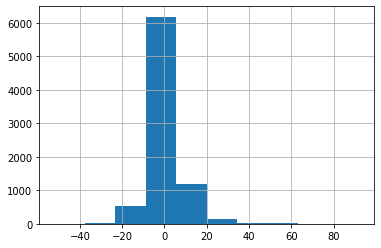

In [ ]:
dataset.rank_change_away.hist()

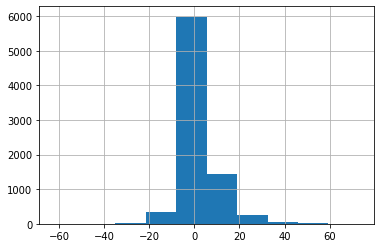

In [ ]:
dataset.rank_change_home.hist()

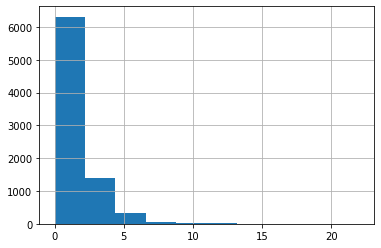

In [ ]:
dataset.home_score.hist()

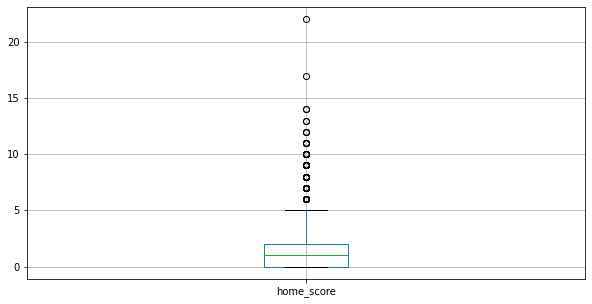

In [ ]:
dataset.boxplot('home_score',figsize=(10,5))

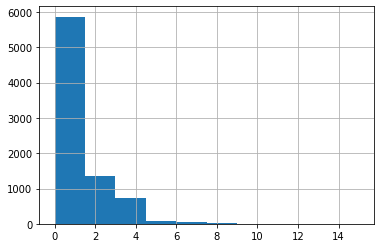

In [ ]:
dataset.away_score.hist()


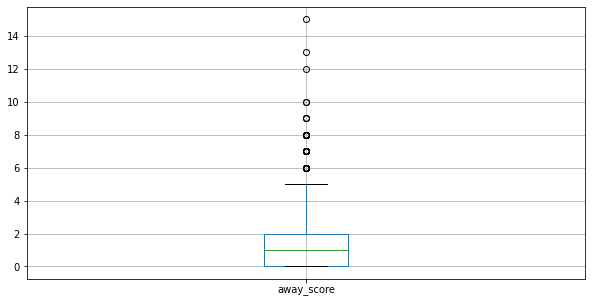

In [ ]:
dataset.boxplot('away_score',figsize=(10,5))

The columns were normally distributed , and upon plotting box plots for the home_score and away_score columns I found that they both had outliers which was afterall expected.


I opted not to drop these outliers and use them in my model instead.

In [ ]:
dataset.confederation.value_counts()

UEFA        2932
African     1916
AFC         1646
CONCACAF     867
CONMEBOL     603
Oceania      161
Name: confederation, dtype: int64

Text(0.5, 1.0, 'Plot showing number of games played per Tournament')

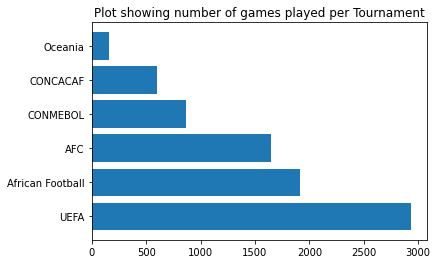

In [ ]:
labels=('UEFA','African Football','AFC','CONMEBOL','CONCACAF','Oceania')
plt.barh(labels ,dataset['confederation'].value_counts())
plt.title('Plot showing number of games played per Tournament')

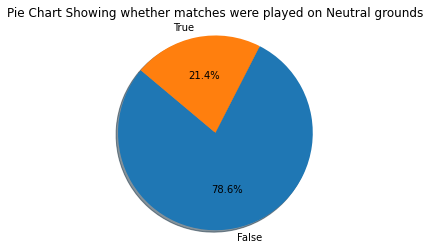

In [ ]:
plt.pie(dataset['neutral'].value_counts() ,labels =['False','True'],autopct = '%1.1f%%', shadow = True, startangle = 140)
plt.axis('equal')
plt.title('Pie Chart Showing whether matches were played on Neutral grounds')
plt.show()

Majority of the games in my dataset were from the UEFA confederation games and they were mainly played on Non-Neutral Grounds.

## 2.2.Bivariate

The majority of games in this dataset were played in the UEFA tournament , while the least amount of games were played in the Oceania league.

Text(0, 0.5, 'Games played')

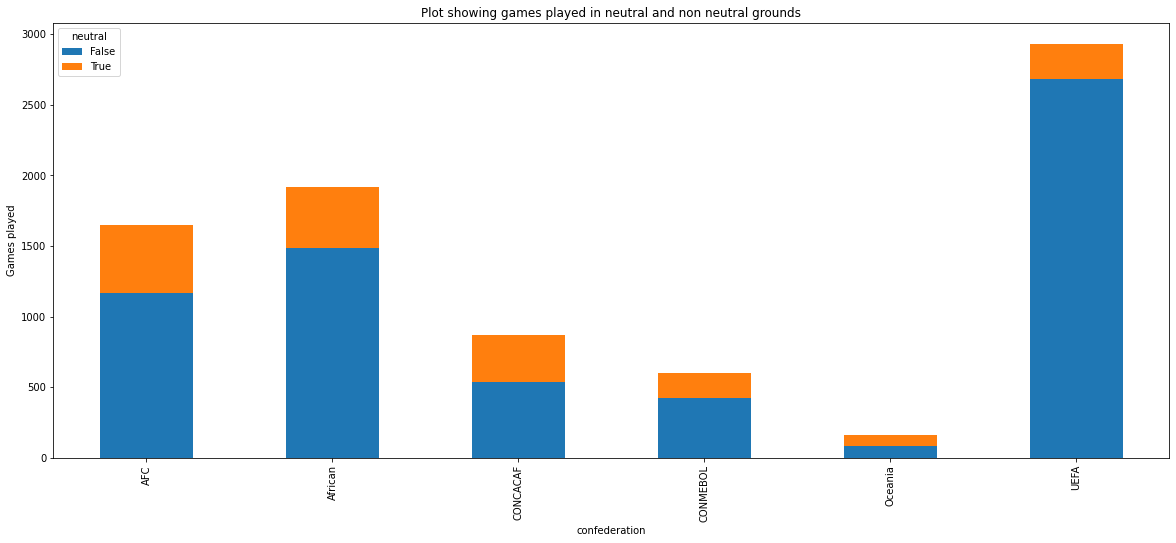

In [ ]:
League = dataset.groupby(['confederation','neutral'])['confederation'].count().unstack('neutral').sort_values(by='confederation')
ax = League.plot.bar(stacked=True, edgecolor='none',figsize=(20,8))
plt.title('Plot showing games played in neutral and non neutral grounds')
plt.ylabel('Games played')

Text(0, 0.5, 'Goals Scored')

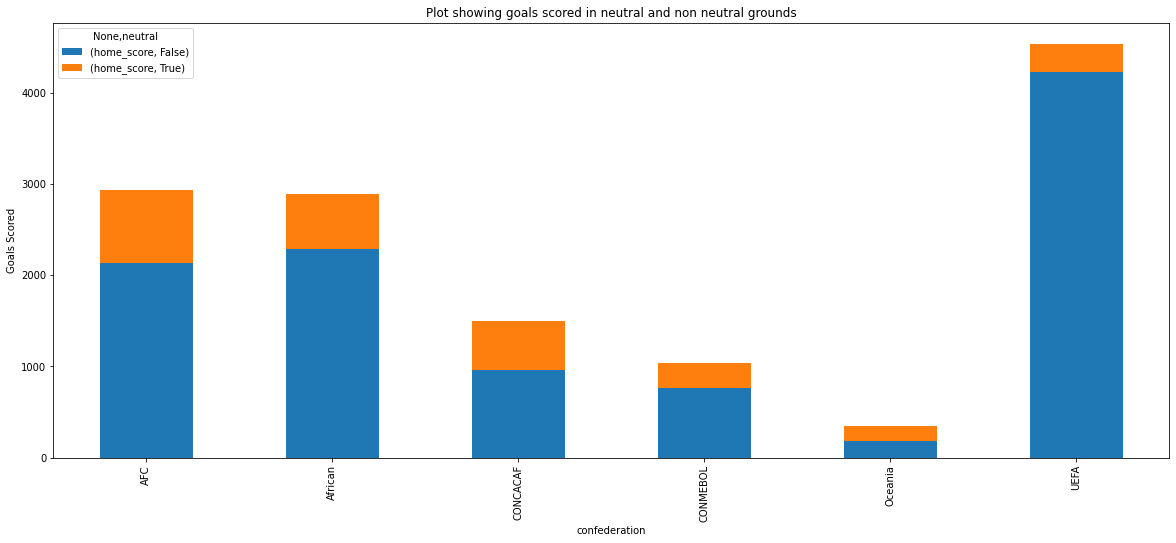

In [ ]:
dataset1 = dataset[['confederation','neutral','home_score']]
League = dataset1.groupby(['confederation','neutral']).sum('home_score').unstack()
ax = League.plot.bar(stacked=True, edgecolor='none',figsize=(20,8))
plt.title('Plot showing goals scored in neutral and non neutral grounds')
plt.ylabel('Goals Scored')

Majority of the goals scored by the Home teams were scored in non-neutral grounds and this was expected as majority of the games played were played on non-neutral grounds.


Similarly majority of the goals scored by the away_teams were also scored on non_neutral grounds as seen below.

Text(0, 0.5, 'Goals Scored')

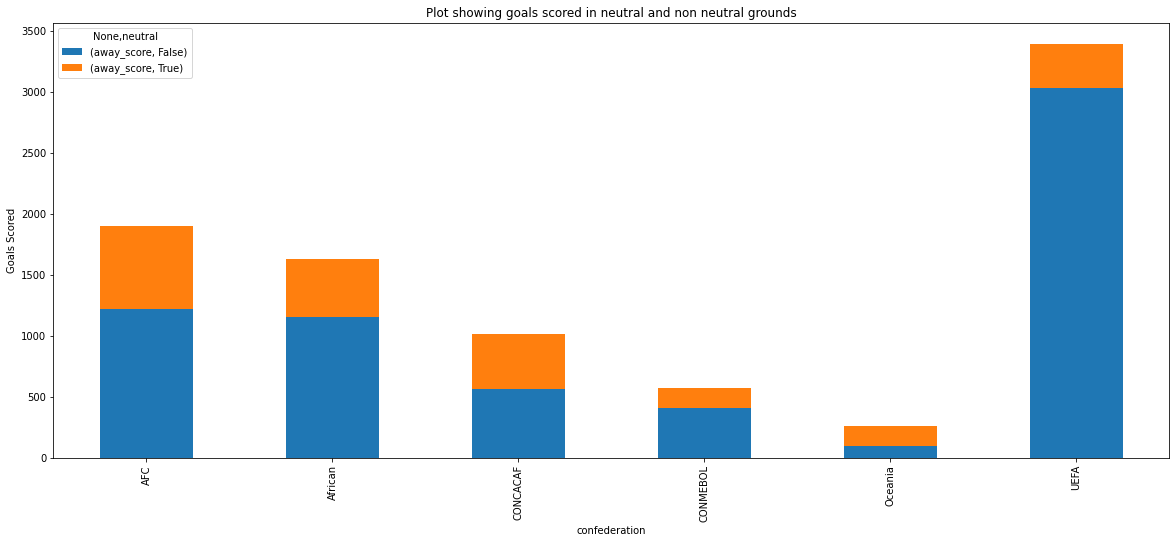

In [ ]:
dataset1 = dataset[['confederation','neutral','away_score']]
League = dataset1.groupby(['confederation','neutral']).sum('away_score').unstack()
ax = League.plot.bar(stacked=True, edgecolor='none',figsize=(20,8))
plt.title('Plot showing goals scored in neutral and non neutral grounds')
plt.ylabel('Goals Scored')

Text(0, 0.5, 'Goals Scored')

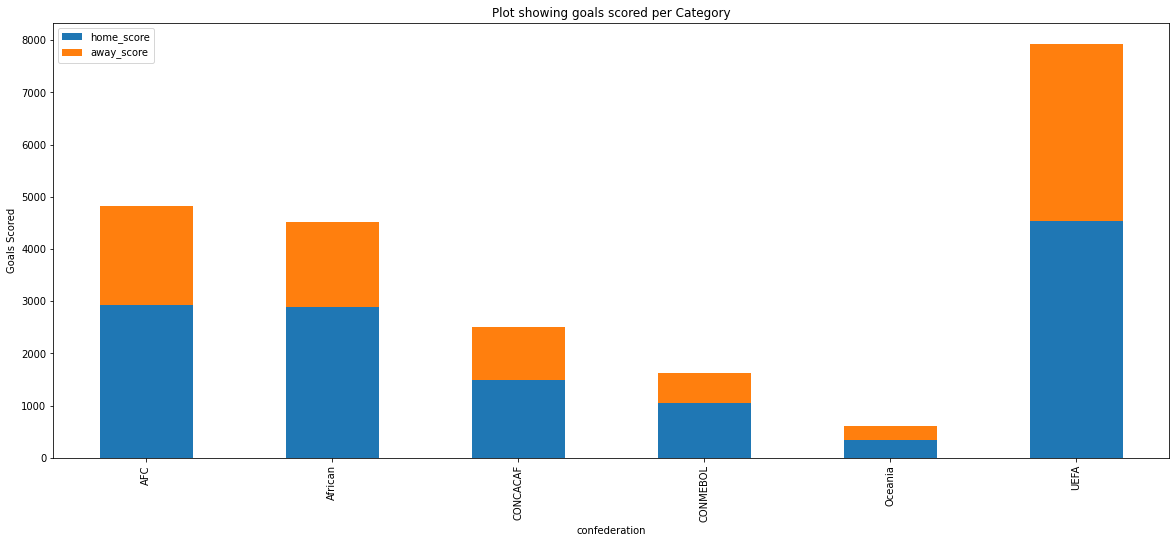

In [ ]:
dataset1 = dataset[['confederation','home_score','away_score']]
League = dataset1.groupby(['confederation']).sum(['away_score','home_score']).sort_values(by=['confederation'])
ax = League.plot.bar(stacked=True, edgecolor='none',figsize=(20,8))
plt.title('Plot showing goals scored per Category')
plt.ylabel('Goals Scored')

Text(0, 0.5, 'Goals Scored')

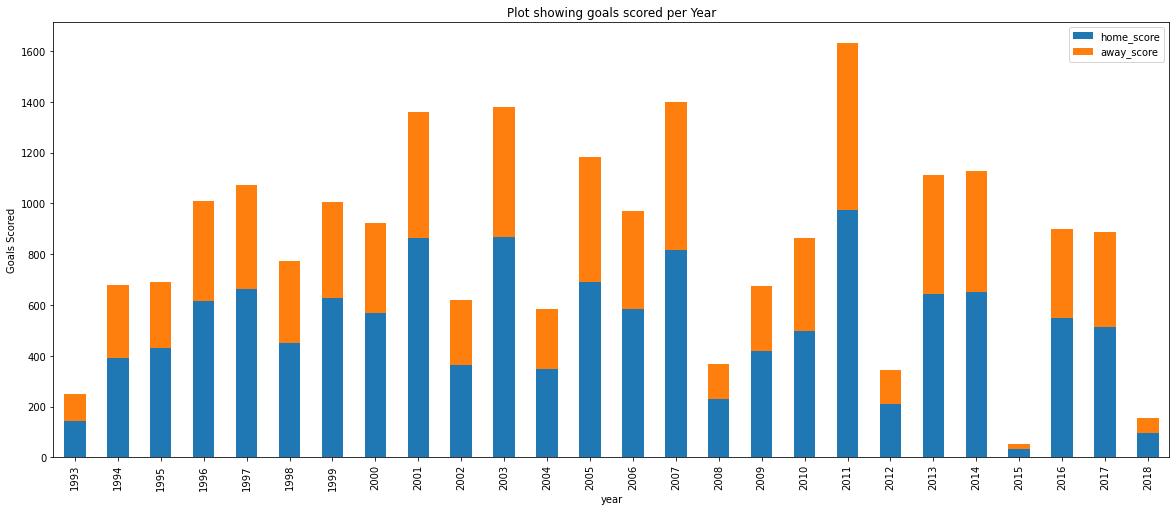

In [ ]:
dataset1 = dataset[['year','home_score','away_score']]
League = dataset1.groupby(['year']).sum(['away_score','home_score']).sort_values(by=['year'])
ax = League.plot.bar(stacked=True, edgecolor='none',figsize=(20,8))
plt.title('Plot showing goals scored per Year')
plt.ylabel('Goals Scored')

Furthermore Majority of the goals scored within all the Tournaments were scored by the home team as opposed to the away team.

Gaes played in 2011 scored the most goals compared to other years and it can be seen that the home teams scored the most goals.

Text(0, 0.5, 'Goals Scored')

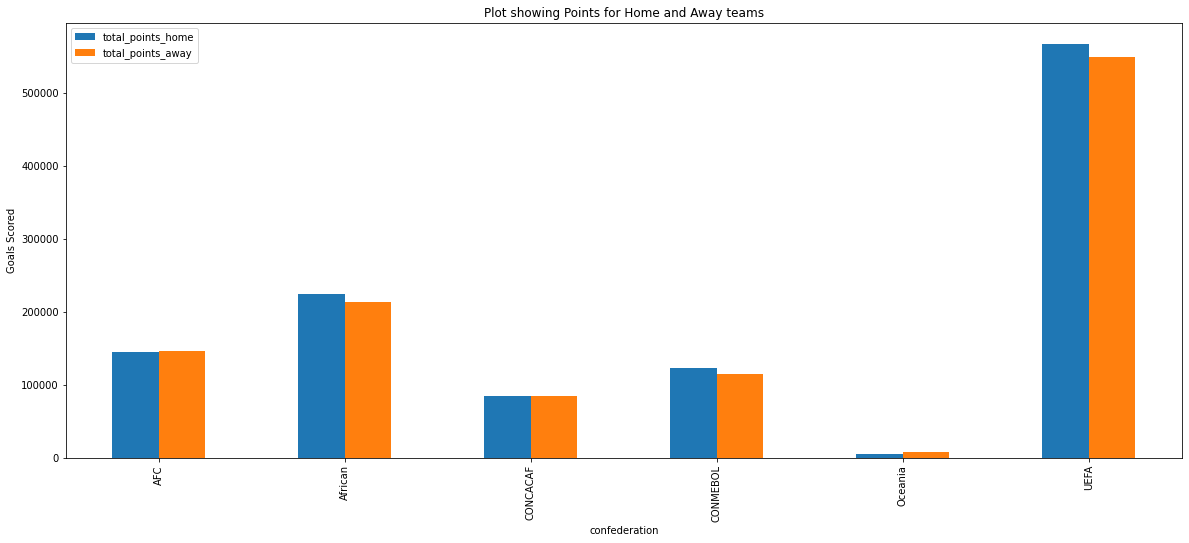

In [ ]:
dataset1 = dataset[['confederation','total_points_home','total_points_away']]
League = dataset1.groupby(['confederation']).sum(['total_points_home','total_points_away']).sort_values(by=['confederation'])
ax = League.plot.bar(stacked=False, edgecolor='none',figsize=(20,8))
plt.title('Plot showing Points for Home and Away teams')
plt.ylabel('Goals Scored')

The number of points obtained by both home and away teams across seasons is almost equal across the various leagues.

Text(0, 0.5, 'Rank Change')

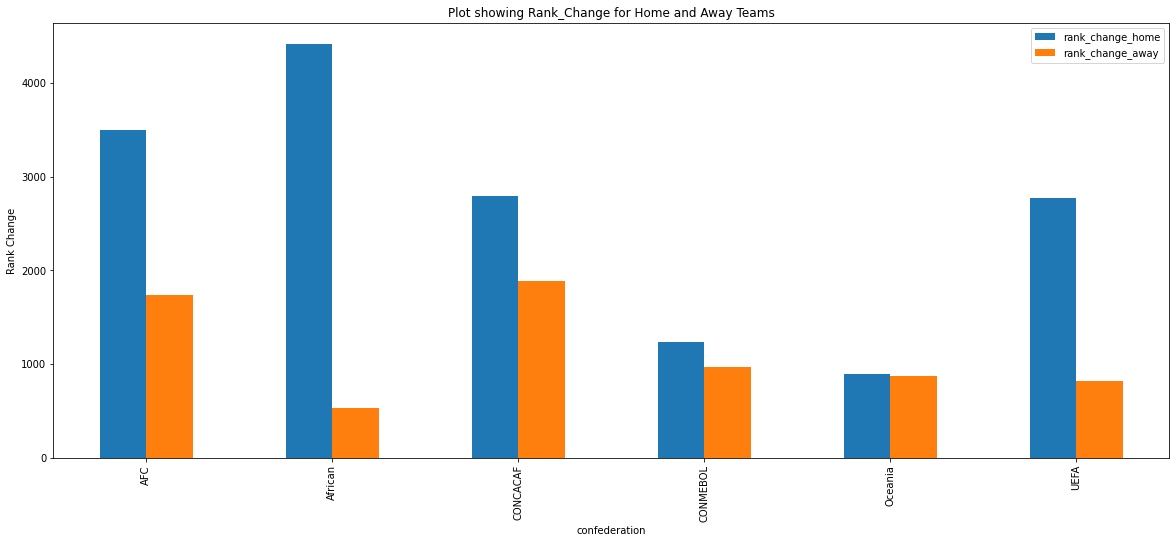

In [ ]:
dataset1 = dataset[['confederation','rank_change_home','rank_change_away']]
League = dataset1.groupby(['confederation']).sum(['rank_change_home','rank_change_away']).sort_values(by=['confederation'])
ax = League.plot.bar(stacked=False, edgecolor='none',figsize=(20,8))
plt.title('Plot showing Rank_Change for Home and Away Teams')
plt.ylabel('Rank Change')

The Home Teams seem to have higher ranks as compared to the teams that are playing Away.

In [ ]:
dataset.drop(['year','home_team','away_team','country_x','confederation','tournament','total_points_home','total_points_away','month','date_x'],axis=1,inplace=True)

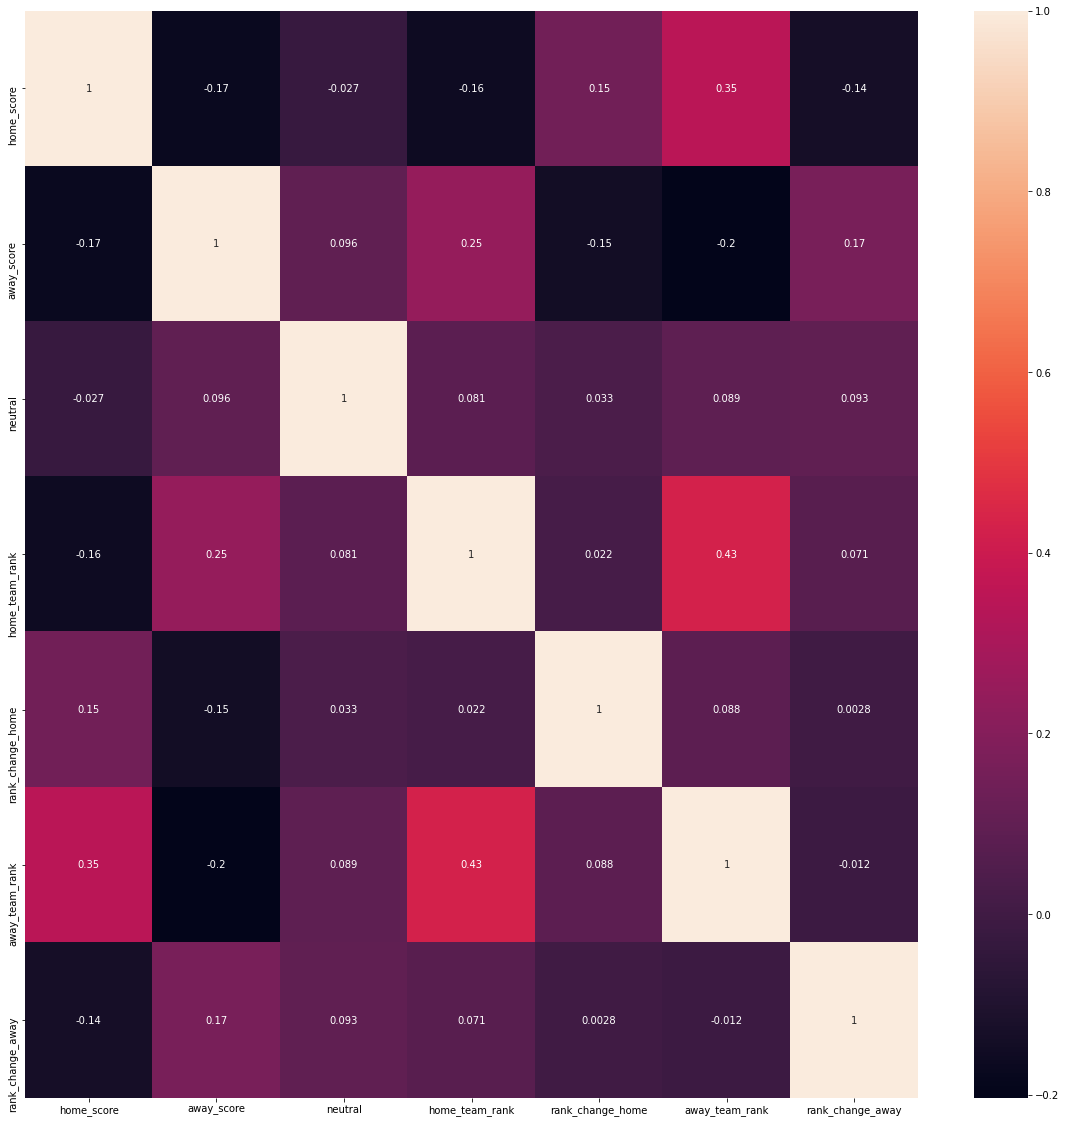

In [ ]:
plt.subplots(figsize=(20,20))
sns.heatmap(dataset.corr(),annot=True)

# 3.Logistic

In order to carry out Logistic Regression I first wrote a function that I applied on the home_score and the away_score columns.

The function characterized whether a game was Won ,lost or Drawn by either of the teams.

Win was 'W'

Lost was 'L'

Draw was 'D'


In [ ]:
def goals(score):
    home_score = score[0]
    away_score = score[1]
  
    if home_score > away_score:
        return 'W'
    elif home_score == away_score:
        return 'D'
    else:
        return 'L'
    return home_score

In [ ]:
dataset['home_scores'] = dataset[['home_score', 'away_score']].apply(goals, axis=1)

In [ ]:
def goals(score):
    home_score = score[0]
    away_score = score[1]
  
    if home_score > away_score:
        return 'L'
    elif home_score == away_score:
        return 'D'
    else:
        return 'W'
    return home_score

In [ ]:
dataset['away_scores'] = dataset[['home_score', 'away_score']].apply(goals, axis=1)

In [ ]:
dataset

,home_score,away_score,neutral,home_team_rank,rank_change_home,away_team_rank,rank_change_away,home_scores,away_scores
0,0,0,False,19,16,67,1,D,D
1,0,1,False,70,8,5,5,L,W
2,0,0,False,22,-6,35,30,D,D
3,1,5,False,94,31,8,-5,L,W
4,0,0,True,58,-7,25,7,D,D
...,...,...,...,...,...,...,...,...,...
8149,3,0,False,117,0,105,21,W,L
8150,1,1,False,126,7,129,10,D,D
8151,0,1,True,123,-2,120,13,L,W
8152,1,0,False,53,-5,55,0,W,L


Next I encoded the column using labelencoder , initially I wanted to use the get_dummies but that proved challenging as it gave me two columns while the label in this model takes only one column,so I opted to use labelencoding.

In [ ]:
# import labelencoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['home_scores'] = le.fit_transform(dataset['home_scores'])
dataset['away_scores'] = le.fit_transform(dataset['away_scores'])

In [ ]:
dataset.head()

,home_score,away_score,neutral,home_team_rank,rank_change_home,away_team_rank,rank_change_away,home_scores,away_scores
0,0,0,False,19,16,67,1,0,0
1,0,1,False,70,8,5,5,1,2
2,0,0,False,22,-6,35,30,0,0
3,1,5,False,94,31,8,-5,1,2
4,0,0,True,58,-7,25,7,0,0


In [ ]:
dataset['home_scores'].value_counts()

2    4003
1    2233
0    1889
Name: home_scores, dtype: int64

W was encoded as 2

L as 1 

D as 0

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8125 entries, 0 to 8153
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   home_score        8125 non-null   int64
 1   away_score        8125 non-null   int64
 2   neutral           8125 non-null   bool 
 3   home_team_rank    8125 non-null   int64
 4   rank_change_home  8125 non-null   int64
 5   away_team_rank    8125 non-null   int64
 6   rank_change_away  8125 non-null   int64
 7   home_scores       8125 non-null   int64
 8   away_scores       8125 non-null   int64
dtypes: bool(1), int64(8)
memory usage: 579.2 KB


I then set my feature variables as the Rank_Change and Rank as using only Rank gives the model less accuracy.

In [ ]:
X = dataset.drop(['home_scores','away_scores','home_score','away_score','neutral'],axis=1)
y = dataset["home_scores"]


In [ ]:
X.head()

,home_team_rank,rank_change_home,away_team_rank,rank_change_away
0,19,16,67,1
1,70,8,5,5
2,22,-6,35,30
3,94,31,8,-5
4,58,-7,25,7


In [ ]:
y.head()

0    0
1    1
2    0
3    1
4    0
Name: home_scores, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=40)
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(max_iter=300)
LogReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=300,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
LogReg.score(X,y)

0.6454153846153846

In [ ]:
y_pred = LogReg.predict(X_test)

Evaluating the Model

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[ 21, 135, 223],
       [ 22, 312, 126],
       [ 16,  60, 710]])

The model predicts the right outcome 21,312 and 710 times.

Carrying out a Grid Search in order to find the Hyperparameters of the Model , 

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold

In [ ]:
# define models and parameters
model = LogisticRegression(max_iter=1000)
solvers = ['newton-cg', 'lbfgs', 'liblinear','saga']
penalty = ['l2','l1']
c_values = [1.0, 0.1, 0.01,0.001,0.0025,0.003,0.005]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=10)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_test, y_test)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


Best: 0.647272 using {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}


#4.Polynomial

We are trying to predict the number of Goals scored by a Team, given that the Team is Home or Away based on their rank and also the rank_change of the team as our features.

#### 4.1.Goals scored by the home team.


I opted to evaluate the Number of Goals scored by the Home team based on the



*   The Rank Column
*   The Rank Change Column




In [ ]:
dataset

,home_score,away_score,neutral,home_team_rank,rank_change_home,away_team_rank,rank_change_away,home_scores,away_scores
0,0,0,False,19,16,67,1,0,0
1,0,1,False,70,8,5,5,1,2
2,0,0,False,22,-6,35,30,0,0
3,1,5,False,94,31,8,-5,1,2
4,0,0,True,58,-7,25,7,0,0
...,...,...,...,...,...,...,...,...,...
8149,3,0,False,117,0,105,21,2,1
8150,1,1,False,126,7,129,10,0,0
8151,0,1,True,123,-2,120,13,1,2
8152,1,0,False,53,-5,55,0,2,1


In [ ]:
dataset.drop(['away_score','away_team_rank','rank_change_away','away_scores','away_score'],axis=1,inplace=True)

In [ ]:
dataset

,home_score,neutral,home_team_rank,rank_change_home,home_scores
0,0,False,19,16,0
1,0,False,70,8,1
2,0,False,22,-6,0
3,1,False,94,31,1
4,0,True,58,-7,0
...,...,...,...,...,...
8149,3,False,117,0,2
8150,1,False,126,7,0
8151,0,True,123,-2,1
8152,1,False,53,-5,2


In [ ]:
X = dataset.iloc[:,2:4]

Checking the correlation and the VIF of the two columns:


The columns are not highly correlated and they have a low VIF score therefore we use them in our analysis.

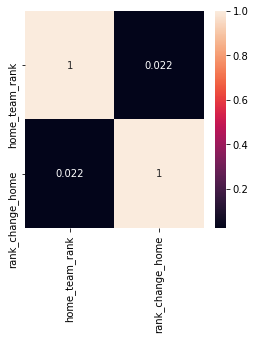

In [ ]:
plt.subplots(figsize=(4,4))
sns.heatmap(X.corr(),annot=True)

In [ ]:
correlations = X.corr()
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)


,home_team_rank,rank_change_home
home_team_rank,1.000487,-0.022083
rank_change_home,-0.022083,1.000487


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [ ]:
X = dataset.iloc[:,2:4].values
y = dataset.iloc[:,0].values

In [ ]:
X

array([[ 19,  16],
       [ 70,   8],
       [ 22,  -6],
       ...,
       [123,  -2],
       [ 53,  -5],
       [ 78,   1]])

In [ ]:
y

array([0, 0, 0, ..., 0, 1, 1])

In [ ]:
dataset.home_score.describe()

count    8125.000000
mean        1.629415
std         1.609119
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max        22.000000
Name: home_score, dtype: float64

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = .20, random_state = 40)
regr = LinearRegression()
regr.fit(X_train, Y_train)
#regr = linear_model.LinearRegression() 
#regr.fit(X_train, Y_train)
predicted = regr.predict(X_test)
df = pd.DataFrame({'Actual': Y_test, 'Predicted': predicted})
df

,Actual,Predicted
0,1,1.911316
1,2,0.993950
2,0,1.661648
3,2,2.719151
4,0,1.914188
...,...,...
1620,0,2.203425
1621,0,1.723067
1622,3,1.774331
1623,3,1.950955


In [ ]:
from sklearn.metrics import r2_score
r2_score(Y_test,predicted)

0.031516521638881856

In [ ]:
poly_reg = PolynomialFeatures(degree=3) 
X_poly = poly_reg.fit_transform(X)


pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)
y_pred = pol_reg.predict(X_poly)
y_pred

array([2.32357588, 1.8125563 , 1.63990915, ..., 1.30637622, 1.36945021,
       1.51868506])

In [ ]:
pol_reg.coef_

array([ 0.00000000e+00, -2.08046006e-02,  3.21242683e-02,  1.88854468e-04,
        1.89546559e-04, -4.79980857e-04, -6.13830379e-07, -6.77980792e-07,
        2.80201688e-06, -1.09344002e-05])

In [ ]:
poly_pred = pol_reg.predict(poly_reg.fit_transform([[2,30]]))
print('Goals Scored by the Home Team: %d' %poly_pred)


Goals Scored by the Home Team: 2


I based the Regression equation on both the rank of the home_team and the change of the rank, with these two features I then proceeded to predict the number of goals scored by the home team. 

Investigating for multicollinearity there was none as I used only two columns and they  both had a very low VIF score.

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))


Mean Absolute Error: 1.1418332401381366
Mean Squared Error: 2.4377918052966554
Root Mean Squared Error: 1.5613429492896989


The RMSE was higher than expected and this shall be corrected in due time.

In [ ]:
residuals = np.subtract(y_pred, y)

pd.DataFrame(residuals).describe()

residuals.mean()

-2.4486395816963453e-17

In [ ]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(test_result,p_value)
print(critical_value)

12303.701929898843 0.0
inf


The test_result is less than the critical value therefore we fail to reject the null hypothesis and conclude that the model has a constant variance.

#### 4.2.Goals scored by the away team.


I opted to evaluate the Number of Goals scored by the Home team based on the



*   The Rank Column
*   The Rank Change Column




In [ ]:
dataset

,home_score,away_score,neutral,home_team_rank,rank_change_home,away_team_rank,rank_change_away,home_scores,away_scores
0,0,0,False,19,16,67,1,0,0
1,0,1,False,70,8,5,5,1,2
2,0,0,False,22,-6,35,30,0,0
3,1,5,False,94,31,8,-5,1,2
4,0,0,True,58,-7,25,7,0,0
...,...,...,...,...,...,...,...,...,...
8149,3,0,False,117,0,105,21,2,1
8150,1,1,False,126,7,129,10,0,0
8151,0,1,True,123,-2,120,13,1,2
8152,1,0,False,53,-5,55,0,2,1


In [ ]:
dataset.drop(['home_score','home_scores','home_team_rank','rank_change_home','away_scores'],axis=1,inplace=True)

In [ ]:
dataset

,away_score,neutral,away_team_rank,rank_change_away
0,0,False,67,1
1,1,False,5,5
2,0,False,35,30
3,5,False,8,-5
4,0,True,25,7
...,...,...,...,...
8149,0,False,105,21
8150,1,False,129,10
8151,1,True,120,13
8152,0,False,55,0


In [ ]:
X = dataset.iloc[:,2:4]

Checking the correlation and the VIF of the two columns:


The columns are not highly correlated and they have a low VIF score therefore we use them in our analysis.

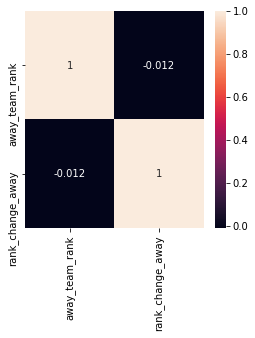

In [ ]:
plt.subplots(figsize=(4,4))
sns.heatmap(X.corr(),annot=True)

In [ ]:
correlations = X.corr()
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)


,away_team_rank,rank_change_away
away_team_rank,1.000132,0.011510
rank_change_away,0.011510,1.000132


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [ ]:
X = dataset.iloc[:,2:4].values
y = dataset.iloc[:,0].values

In [ ]:
X

array([[ 67,   1],
       [  5,   5],
       [ 35,  30],
       ...,
       [120,  13],
       [ 55,   0],
       [ 51,  -2]])

In [ ]:
y

array([0, 1, 0, ..., 1, 0, 1])

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = .20, random_state = 40)
regr = LinearRegression()
regr.fit(X_train, Y_train)
#regr = linear_model.LinearRegression() 
#regr.fit(X_train, Y_train)
predicted = regr.predict(X_test)
df = pd.DataFrame({'Actual': Y_test, 'Predicted': predicted})
df

,Actual,Predicted
0,1,1.267482
1,2,1.195321
2,1,1.478868
3,1,1.356148
4,0,1.117905
...,...,...
1620,3,1.525300
1621,1,1.093304
1622,0,0.973883
1623,1,1.067575


In [ ]:
from sklearn.metrics import r2_score
r2_score(Y_test,predicted)

0.0818522201427333

In [ ]:
poly_reg = PolynomialFeatures(degree=3) 
X_poly = poly_reg.fit_transform(X)


pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)
y_pred = pol_reg.predict(X_poly)
y_pred

array([1.00966857, 1.88455162, 2.08200262, ..., 1.23844135, 1.04099825,
       0.99352025])

In [ ]:
pol_reg.coef_

array([ 0.00000000e+00, -2.15960789e-02,  4.63291241e-02,  1.80473813e-04,
       -1.91172010e-04, -3.86067349e-04, -5.28964536e-07,  2.80047877e-07,
        4.61478872e-06, -4.76783595e-06])

In [ ]:
poly_pred = pol_reg.predict(poly_reg.fit_transform([[30,-30]]))
print('Goals Scored by the Away Team: %d' %poly_pred)


Goals Scored by the Away Team: 0


I based the Regression equation on both the rank of the home_team and the change of the rank, with these two features I then proceeded to predict the number of goals scored by the home team. 

Investigating for multicollinearity there was none as I used only two columns and they  both had a very low VIF score.

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))


Mean Absolute Error: 0.8913059612328097
Mean Squared Error: 1.4993829382129256
Root Mean Squared Error: 1.2244929310587813


The RMSE was higher than expected and this shall be corrected in due time.

In [ ]:
residuals = np.subtract(y_pred, y)

pd.DataFrame(residuals).describe()

residuals.mean()

-1.0494169635841479e-17

In [ ]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(test_result,p_value)
print(critical_value)

9622.290571099476 0.0
inf


The test_result is less than the critical value therefore we fail to reject the null hypothesis and conclude that the model has a constant variance.